In [8]:
import tensorflow as tf

In [9]:
import os
import zipfile

local_zip = 'tmp/plant.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [10]:
base_dir = '/tmp/plant'

In [11]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [12]:
train_healthy_dir = os.path.join(train_dir, "healthy")
train_infected_dir = os.path.join(train_dir, 'infected')

In [13]:
validation_healthy_dir = os.path.join(validation_dir, 'healthy')
validation_infected_dir = os.path.join(validation_dir, 'infected')

In [14]:
train_healthy_fnames = os.listdir( train_healthy_dir )
train_infected_fnames = os.listdir( train_infected_dir )

print(train_healthy_fnames[:10])
print(train_infected_fnames[:10])

['9e2a71e5-2a59-4e62-9c6c-581fe9091a10___RS_HL 0132.JPG', 'e2991a66-412d-4841-8dc0-524e38338a82___GH_HL Leaf 517.1.JPG', 'a5e54e01-2cd5-482a-bfba-8728ca32473c___GH_HL Leaf 426.JPG', 'e9392a5e-2fac-48c5-a23d-df3aa3f61048___GH_HL Leaf 217.JPG', 'ccfba9c3-41a5-40de-b71a-980bc3336ae7___GH_HL Leaf 522.2.JPG', '87a77f4d-38bd-42dc-bdd3-5f2a1fa95ca7___GH_HL Leaf 469.3.JPG', 'ab1658d8-ef48-4068-b2b5-ce49fb3d06c0___GH_HL Leaf 397.1.JPG', 'd80d474d-1d8a-4381-8960-db93b611b5c8___GH_HL Leaf 390.JPG', 'efe6c986-b85c-40f1-8cb5-345acbb36b71___RS_HL 0579.JPG', 'cdf10741-0ed4-4a27-a2e9-8970e4426730___RS_HL 0356.JPG']
['cb0e04ea-9d44-4c3f-b528-d7aa32aa0b85___RS_Erly.B 7850.JPG', 'f79134d0-8c6a-43ad-ba78-9323f9a9f84f___RS_Erly.B 9427.JPG', '7b085d56-6867-4946-8208-5823afeba034___RS_Erly.B 7384.JPG', '8a13da5b-4bc2-485a-962d-df8c6634ea00___RS_Erly.B 7519.JPG', '9744fa97-16b3-4a16-afc0-c86ac0397759___RS_Erly.B 6411.JPG', '605e0af6-415f-4e25-8f0d-a8f36371732b___RS_Erly.B 7827.JPG', '2179421c-3ce3-4581-8b65-1

In [17]:
print('total training healthy images :', len(os.listdir(      train_healthy_dir ) ))
print('total training infected images :', len(os.listdir(      train_infected_dir ) ))

print('total validation healthy images :', len(os.listdir( validation_healthy_dir ) ))
print('total validation infected images :', len(os.listdir( validation_infected_dir ) ))

total training healthy images : 1591
total training infected images : 1000
total validation healthy images : 54
total validation infected images : 42


In [18]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0

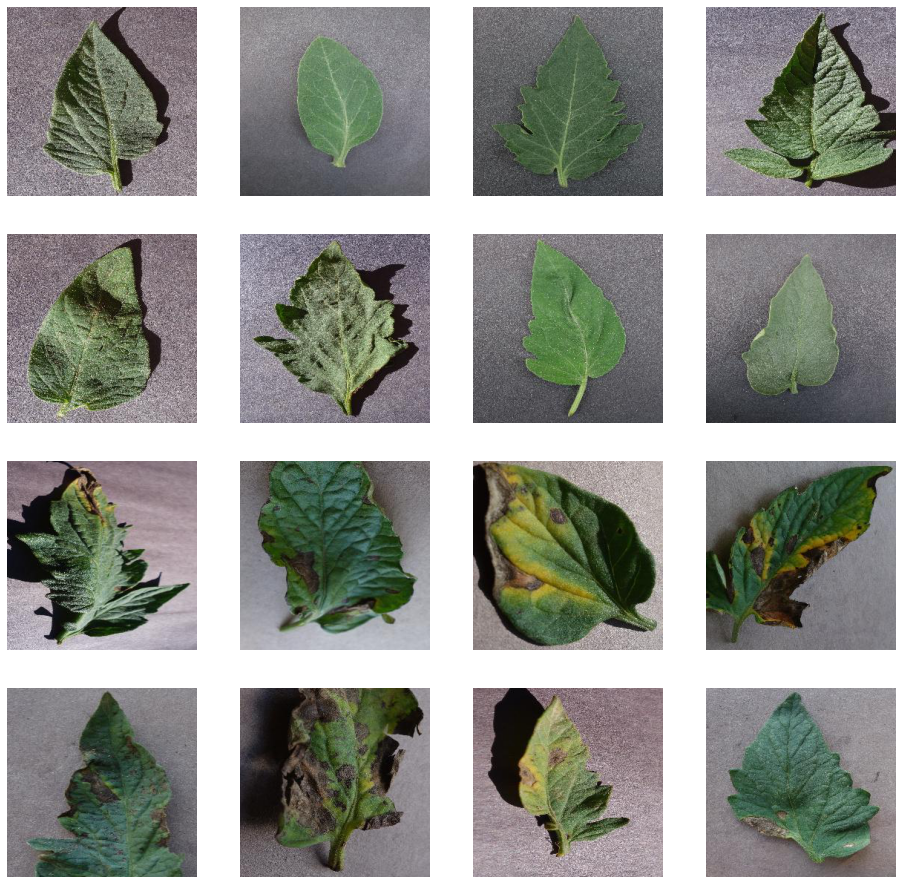

In [22]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_healthy_pix = [os.path.join(train_healthy_dir, fname) 
                for fname in train_healthy_fnames[ pic_index-8:pic_index] 
               ]

next_infected_pix = [os.path.join(train_infected_dir, fname) 
                for fname in train_infected_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_healthy_pix+next_infected_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [23]:
from tensorflow import keras

In [24]:
model=keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
keras.layers.MaxPooling2D(2,2),
keras.layers.Conv2D(32,(3,3)),
keras.layers.MaxPooling2D(2,2),
keras.layers.Conv2D(64,(3,3)),
keras.layers.MaxPooling2D(2,2),
keras.layers.Flatten(),
keras.layers.Dense(units=1024,activation='relu'),
keras.layers.Dense(units=1,activation='sigmoid')])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [26]:
from tensorflow.keras.optimizers import RMSprop

In [27]:
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [30]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150,150)

)

Found 2591 images belonging to 2 classes.


In [31]:
validation_generator= test_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150,150)
)

Found 96 images belonging to 2 classes.


In [32]:
history = model.fit_generator(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=100,
    validation_steps=50,
    verbose=2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 - 26s - loss: 1.4655 - accuracy: 0.7830 - val_loss: 2.6844 - val_accuracy: 0.5729
Epoch 2/20
100/100 - 26s - loss: 0.2968 - accuracy: 0.9322
Epoch 3/20
100/100 - 26s - loss: 0.1601 - accuracy: 0.9518
Epoch 4/20
100/100 - 29s - loss: 0.0793 - accuracy: 0.9729
Epoch 5/20
100/100 - 44s - loss: 0.2155 - accuracy: 0.9695
Epoch 6/20
100/100 - 38s - loss: 0.1592 - accuracy: 0.9769
Epoch 7/20
100/100 - 34s - loss: 0.0143 - accuracy: 0.9950
Epoch 8/20
100/100 - 33s - loss: 0.0903 - accuracy: 0.9859
Epoch 9/20
100/100 - 33s - loss: 0.1044 - accuracy: 0.9864
Epoch 10/20
100/100 - 35s - loss: 0.0542 - accuracy: 0.9864
Epoch 11/20
100/100 - 38s - loss: 0.0166 - accuracy: 0.9960
Epoch 12/20
100/100 - 37s - loss: 0.1381 - accuracy: 0.9855
Epoch 13/20
100/100 - 35s - loss: 0.0517 - accuracy: 0.9930
Epoch 14/20
100/100 - 32s - loss: 0.0328 - accuracy: 0.9920
Epoch 15/20
100/100 - 34s - loss: 0.0014 - accuracy

In [33]:
print("Model trained successfully")

Model trained successfully


In [34]:
model.save('plant.hdf5')